# TSF GRIP Task 1_Prediction using Supervised ML_SEP' 2021

Predict the percentage obtained by a student based on the number of study hours.

By Praveen Jacob

# Step 1: Importing Python libraries

In [1]:
#manipulating data 
import pandas as pd; 

#mathematical calculations
import numpy as np;

#data visualization
import matplotlib.pyplot as plt;
%matplotlib inline

# Step 2 Importing Data set

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
# Verifying the data, whether imported successfully or not ?
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Verifying the number of rows and columns
df.shape

(25, 2)

In [5]:
#finding more info about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#checking for null values if any
df.isnull().sum() 

Hours     0
Scores    0
dtype: int64

In [7]:
#looking for a better description of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


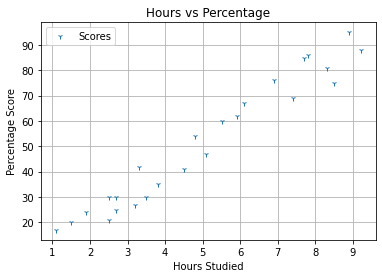

In [19]:
#Visualizing the data
df.plot(x='Hours',y='Scores',style='1')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

We can observe that there is a positive linear relationship between "Hours Studied" and "Percentage Score".


In [30]:
x = df.iloc[:,:1].values
y = df.iloc[:,1:].values

Dividing the data for training & testing the model

In [33]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

We have chosen 80% of the data for training purpose and 20% of the data for testing purpose

# Training the Algorithm

In [36]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 
print("Model has been trained!!!")

Model has been trained!!!


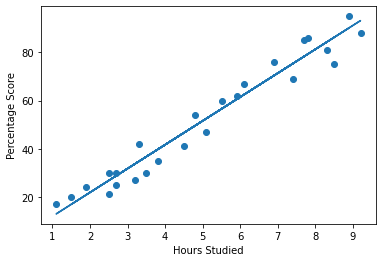

In [38]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

Model is ready to be tested

In [40]:
print(X_test) 
print("Predection of Score")
y_pred = regressor.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Predection of Score
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


Checking the accuracy of our model

In [45]:
comp = pd.DataFrame({ 'Actual':[Y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [46]:
hours = [[9.25]]
pred = regressor.predict(hours)
print(pred)

[[93.69173249]]


In [47]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.183859899002982
